<a href="https://colab.research.google.com/github/KshitijShinde/Skill/blob/main/Skill_LCA_FINAL_COMBINE_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📂 Load and Merge BoT-IoT Dataset CSV Files

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

# === Load and Merge CSVs ===
df1 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_2.csv")
df3 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_3.csv")
df4 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_4.csv")
df = pd.concat([df1, df2, df3, df4], ignore_index=True).drop_duplicates()

# === Dataset Information ===
print("Dataset Information:")
df.info()  # Shows the data types, non-null counts, and memory usage

# === Preview of Dataset ===
print("\nFirst 5 Rows of the Dataset:")
print(df.head())  # Shows the first 5 rows

# === Preprocessing ===
target_column = 'attack'
df = df.select_dtypes(include=[np.number])
df = df.replace([np.inf, -np.inf], np.nan).dropna()
X = df.drop(target_column, axis=1)
y = df[target_column]
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === Balance Data ===
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_scaled, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


<ipython-input-19-5a382d1c019a>:15: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_1.csv")
<ipython-input-19-5a382d1c019a>:16: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_2.csv")
<ipython-input-19-5a382d1c019a>:17: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_3.csv")
<ipython-input-19-5a382d1c019a>:18: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv("/content/drive/MyDrive/bot iot/UNSW_2018_IoT_Botnet_Full5pc_4.csv")


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur            

📊 Class Distribution Before and After Undersampling


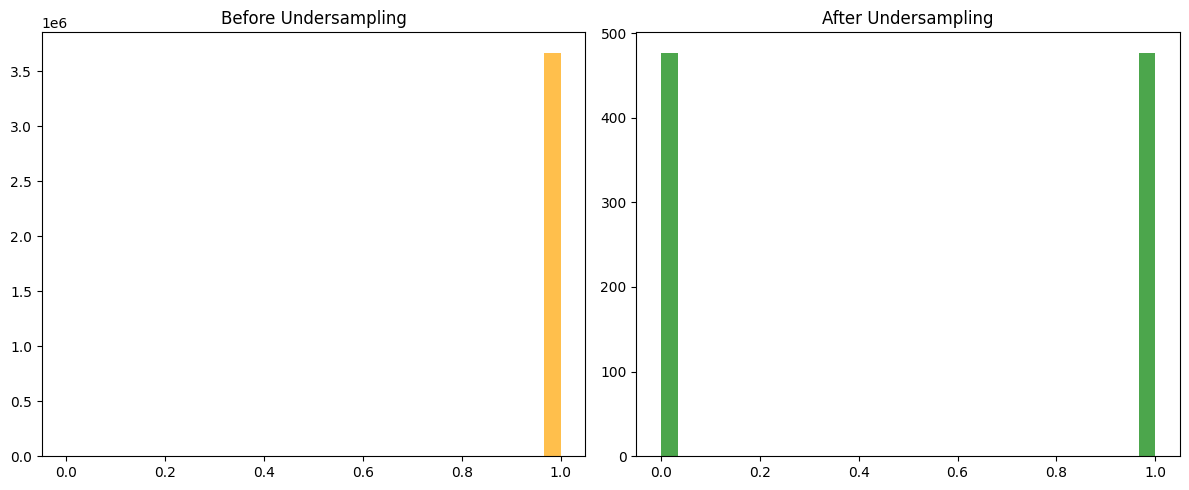

In [7]:
# === Visualization 1: Class Distribution ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='orange', alpha=0.7)
plt.title('Before Undersampling')
plt.subplot(1, 2, 2)
plt.hist(y_resampled, bins=30, color='green', alpha=0.7)
plt.title('After Undersampling')
plt.tight_layout()
plt.show()


🔥 Correlation Heatmap of Features

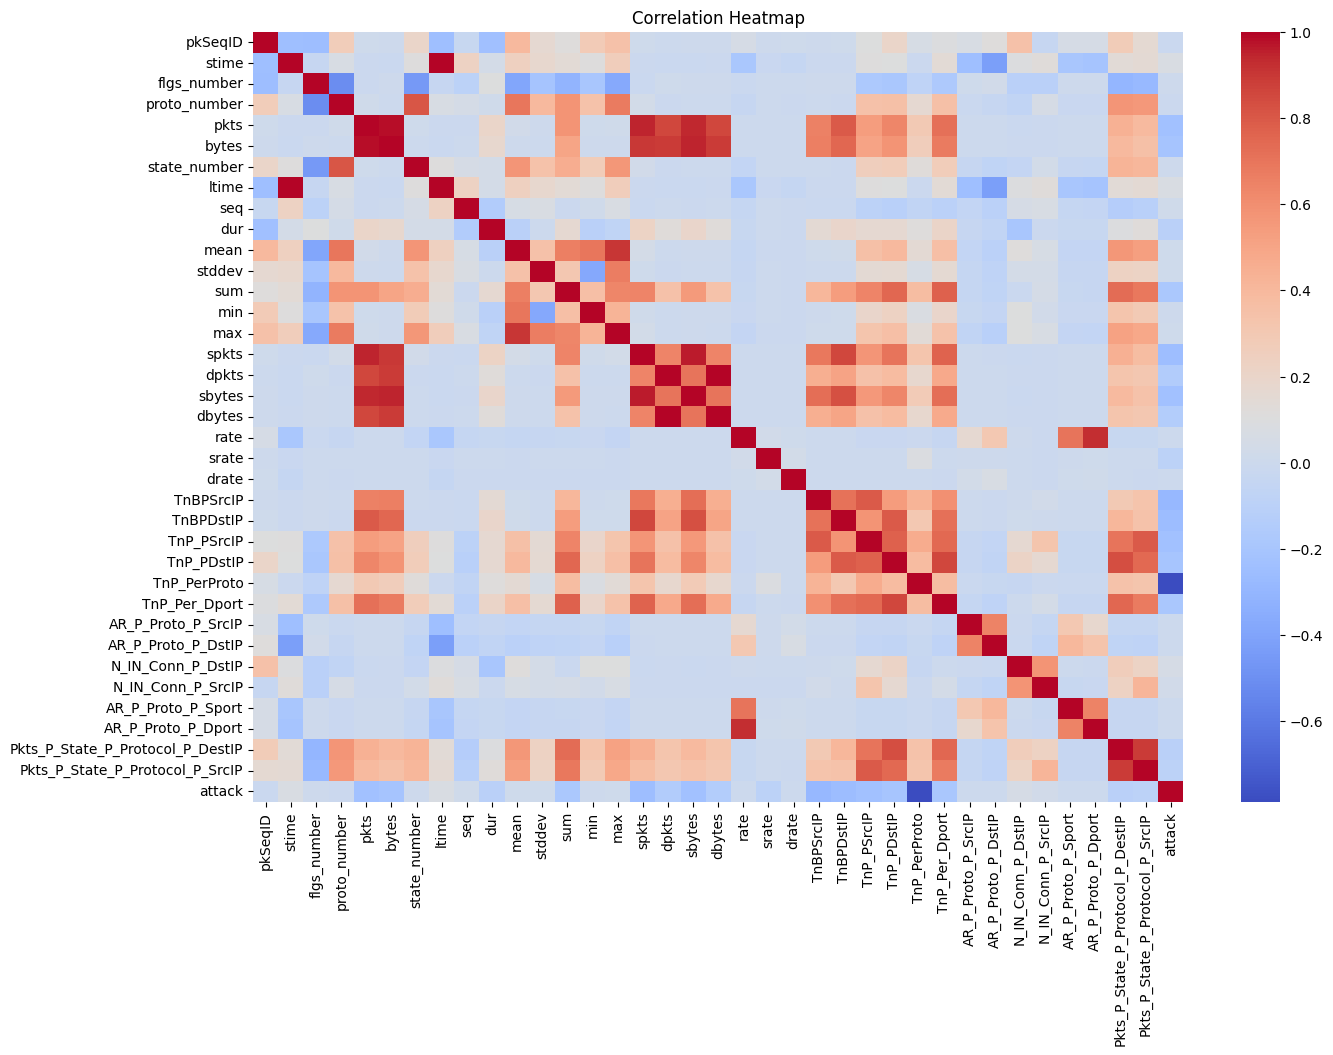

In [8]:
# === Visualization 2: Correlation Heatmap ===
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df[target_column] = y
plt.figure(figsize=(15, 10))
sns.heatmap(X_scaled_df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


📦 Boxplot for Distribution of Sample Features

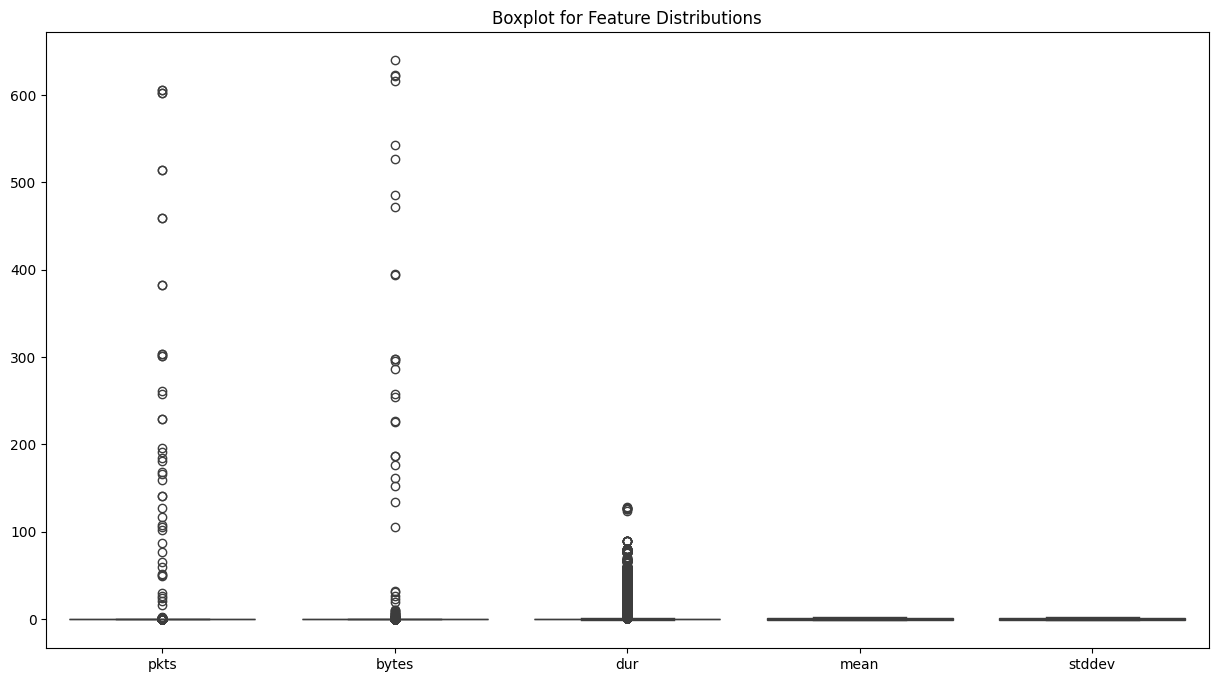

In [14]:
# 5. Boxplot for Feature Distributions (Sample for 5 features)
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_scaled_df[['pkts', 'bytes', 'dur', 'mean', 'stddev']])
plt.title('Boxplot for Feature Distributions')
plt.show()

📊 Class Distribution After Undersampling (Count Plot)

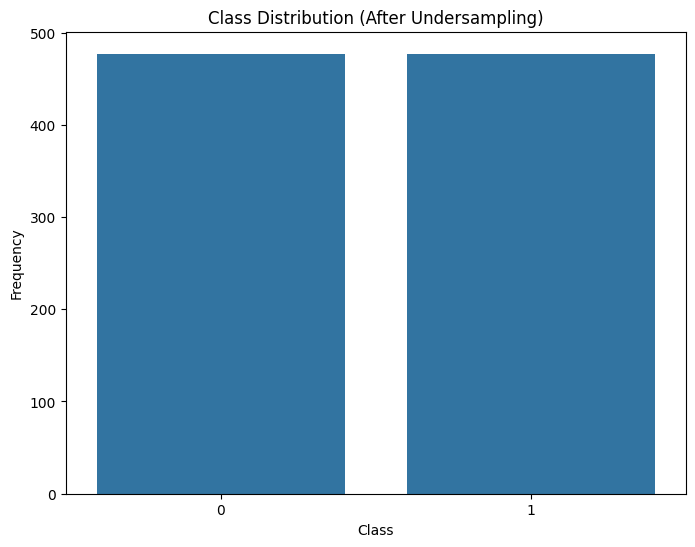

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y_resampled)  # For the resampled target variable
plt.title('Class Distribution (After Undersampling)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

🌲 Embedded Feature Selection using Random Forest

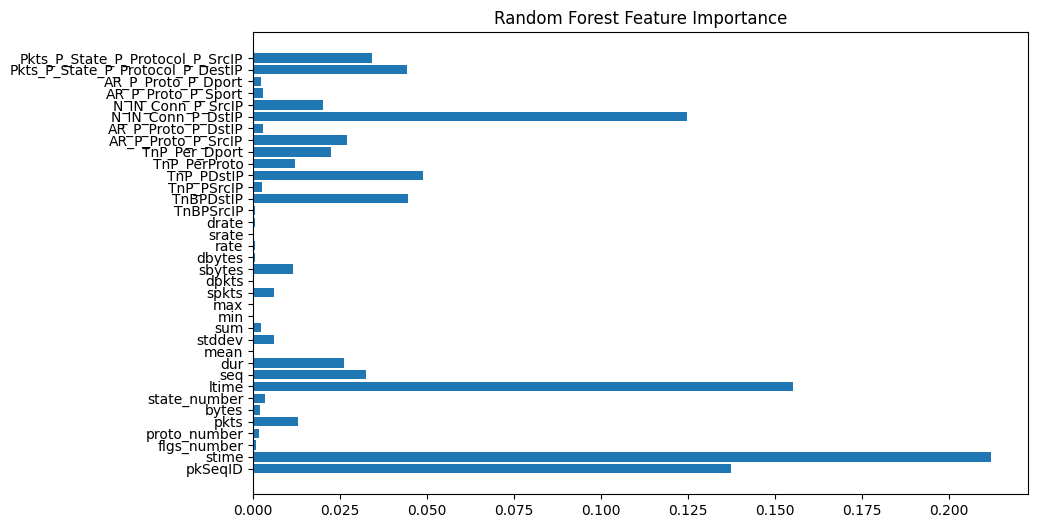

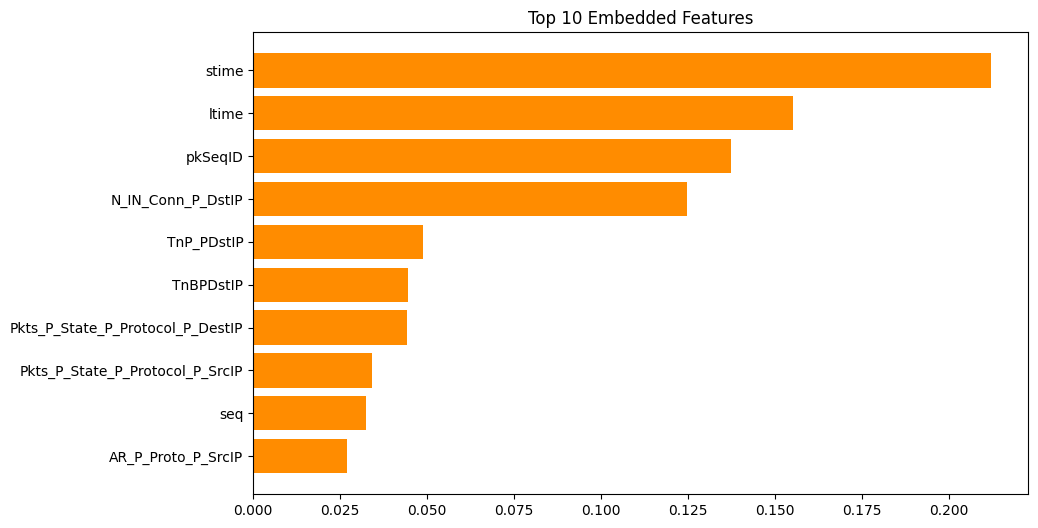

Embedded Feature Selection - Top 10 Features:
Index(['AR_P_Proto_P_SrcIP', 'seq', 'Pkts_P_State_P_Protocol_P_SrcIP',
       'Pkts_P_State_P_Protocol_P_DestIP', 'TnBPDstIP', 'TnP_PDstIP',
       'N_IN_Conn_P_DstIP', 'pkSeqID', 'ltime', 'stime'],
      dtype='object')


In [9]:
# === Feature Importance (Embedded) ===
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
feat_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feat_importance)), feat_importance)
plt.yticks(range(len(feat_importance)), X.columns)
plt.title('Random Forest Feature Importance')
plt.show()

top_n = 10
top_indices = np.argsort(feat_importance)[-top_n:]
top_features_embedded = X.columns[top_indices]
top_importances = feat_importance[top_indices]
plt.figure(figsize=(10, 6))
plt.barh(top_features_embedded, top_importances, color='darkorange')
plt.title(f'Top {top_n} Embedded Features')
plt.show()
print(f"Embedded Feature Selection - Top {top_n} Features:\n{top_features_embedded}")


✅ Feature Selection using SelectKBest (Filter Method)

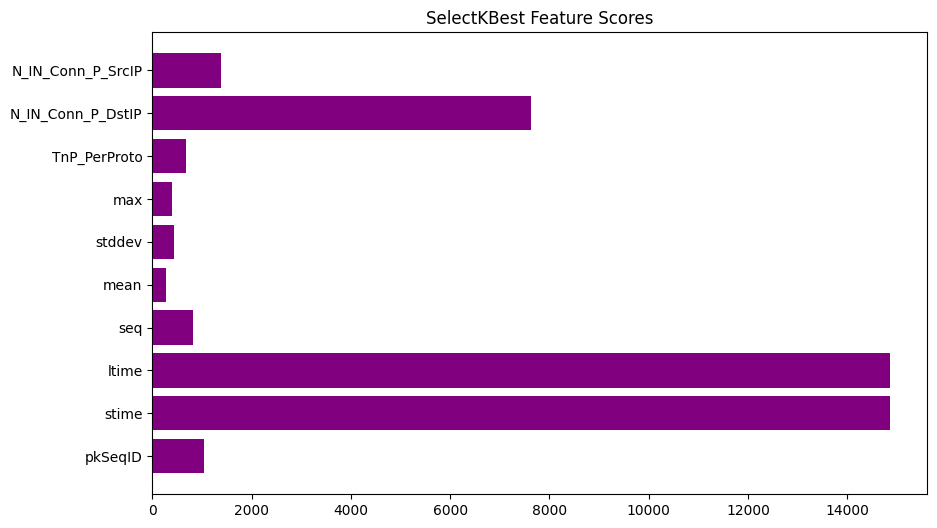

Selected Features using SelectKBest:
Index(['pkSeqID', 'stime', 'ltime', 'seq', 'mean', 'stddev', 'max',
       'TnP_PerProto', 'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP'],
      dtype='object')
Scores of Selected Features:
[ 1034.59146856 14872.4615422  14868.55742279   816.0523226
   266.44400949   434.02469034   399.51026093   677.41341558
  7626.53920493  1379.9558809 ]


In [18]:
# === Feature Selection: SelectKBest ===
selector = SelectKBest(score_func=f_classif, k=10)
X_kbest = selector.fit_transform(X_train, y_train)

# Get the selected features and their scores
kbest_features = X.columns[selector.get_support()]
kbest_scores = selector.scores_[selector.get_support()]

# Plot the SelectKBest feature scores
plt.figure(figsize=(10, 6))
plt.barh(kbest_features, kbest_scores, color='purple')
plt.title("SelectKBest Feature Scores")
plt.show()

# Display the selected features and their scores
print(f"Selected Features using SelectKBest:\n{kbest_features}")
print(f"Scores of Selected Features:\n{kbest_scores}")


🔍 Feature Selection using RFE (Wrapper Method)

Selected Features using RFE: Index(['pkSeqID', 'stime', 'ltime', 'seq', 'TnBPDstIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP',
       'Pkts_P_State_P_Protocol_P_DestIP'],
      dtype='object')


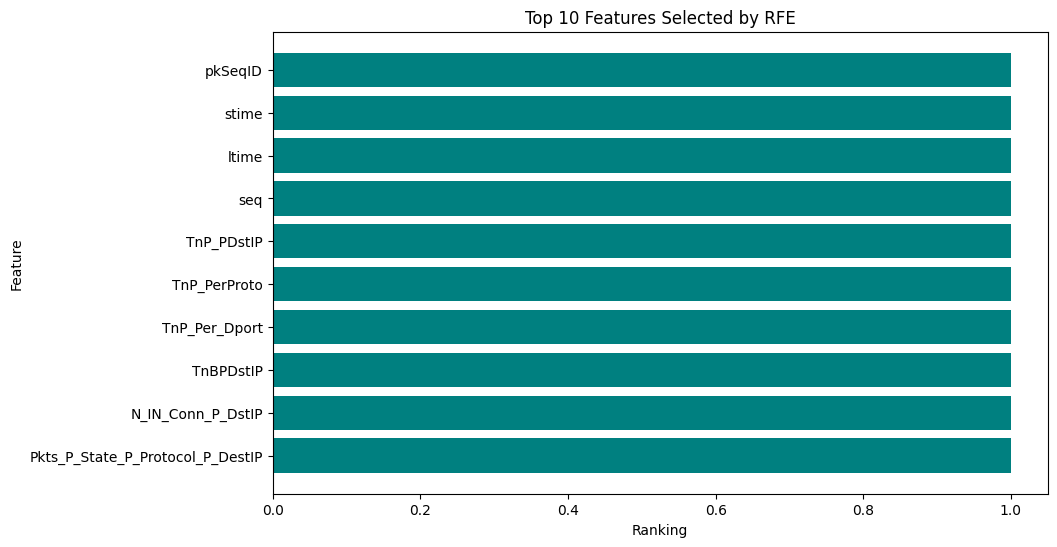

In [11]:
# === Feature Selection: RFE ===
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
X_rfe = rfe.fit_transform(X_train, y_train)
selected_features_rfe = X.columns[rfe.support_]
print(f"Selected Features using RFE: {selected_features_rfe}")

# Plot the feature ranking
ranking = rfe.ranking_

# Sort the ranking and select top N features
sorted_idx = np.argsort(ranking)
top_features_rfe = X.columns[sorted_idx][:top_n]
top_ranking = ranking[sorted_idx][:top_n]

# Plot the RFE ranking
plt.figure(figsize=(10, 6))
plt.barh(top_features_rfe, top_ranking, color='teal')
plt.title('Top 10 Features Selected by RFE')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert the y-axis so that the top feature is at the top
plt.show()


🧠 Ensemble Learning: Bagging Classifier with Decision Trees


Bagging Model - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



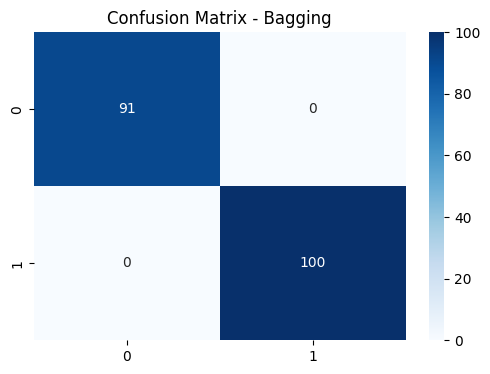

In [12]:
# === Bagging Classifier ===
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("\nBagging Model - Classification Report:")
print(classification_report(y_test, y_pred_bagging))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_bagging), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Bagging")
plt.show()


🚀 Ensemble Learning: Gradient Boosting Classifier Evaluation



Boosting Model - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100

    accuracy                           1.00       191
   macro avg       1.00      1.00      1.00       191
weighted avg       1.00      1.00      1.00       191



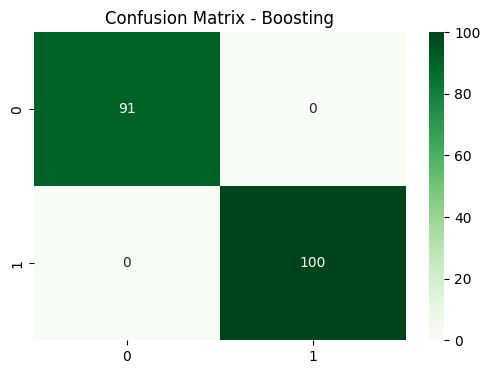

In [13]:
# === Boosting Classifier ===
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("\nBoosting Model - Classification Report:")
print(classification_report(y_test, y_pred_boosting))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_boosting), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Boosting")
plt.show()
